In [1]:
import pandas as pd
import numpy as np
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
final = pd.read_csv('final_clean_data.csv')

In [4]:
averagefinal = duckdb.sql(""" 
                                SELECT
                                    Year,
                                    ANY_VALUE(recession) AS recession,
                                    ANY_VALUE(election) AS election,
                                    AVG(danceability) AS avg_danceability,
                                    AVG(valence) AS avg_valence,
                                    AVG(US_GDP) AS avg_gdp,
                                    AVG(UnemploymentRate) AS avg_unemployment,
                                    AVG(fedfundrate) AS avg_fedfundrate,
                                    AVG(State_prisons) AS avg_imprisonment,
                                    AVG(fertility) AS avg_fertility, 
                                    AVG(DeathRate) AS avg_deathrate, 
                                    AVG("S&P500") AS avg_stockreturn
                                FROM
                                    final
                                GROUP BY
                                    Year
                                ORDER BY
                                    Year
                                """).df()

averagefinal

,year,recession,election,avg_danceability,avg_valence,avg_gdp,avg_unemployment,avg_fedfundrate,avg_imprisonment,avg_fertility,avg_deathrate,avg_stockreturn
0,1960,1,1,0.522367,0.666010,542.38225,5.541667,3.215833,189735.0,3.6540,1339.2,0.00
1,1961,1,0,0.539533,0.714757,562.20975,6.691667,1.955000,196453.0,3.6200,1298.8,0.27
2,1962,0,0,0.562227,0.701820,603.92150,5.566667,2.708333,194886.0,3.4610,1323.6,-0.09
3,1963,0,0,0.545594,0.714175,637.45150,5.641667,3.178333,194155.0,3.3190,1346.3,0.23
4,1964,0,1,0.531146,0.692634,684.46150,5.158333,3.496667,192627.0,3.1900,1303.8,0.16
5,1965,0,0,0.526300,0.652230,742.29025,4.508333,4.075000,189855.0,2.9130,1306.5,0.12
6,1966,0,0,0.564490,0.689643,813.41375,3.791667,5.111667,180409.0,2.7210,1309.0,-0.10
7,1967,0,0,0.549843,0.656637,859.95625,3.841667,4.220000,175317.0,2.5580,1274.0,0.24
8,1968,0,1,0.562324,0.688987,940.64650,3.558333,5.659167,167571.0,2.4640,1304.5,0.11
9,1969,1,0,0.547902,0.653824,1017.61500,3.491667,8.204167,177513.0,2.4560,1271.8,-0.08


## Hypothesis 2 

In [13]:
input_vars = ["avg_unemployment", "election", "avg_deathrate", "avg_stockreturn", "recession"]
X = averagefinal[input_vars]  
y = averagefinal["avg_valence"] 


model = LinearRegression().fit(X, y)


for var_name, var_coef in zip(input_vars, model.coef_):
    print(f"{var_name}: {var_coef:.2f}")


print(f"Intercept: {model.intercept_:.2f}")

avg_unemployment: 0.01
election: 0.01
avg_deathrate: 0.00
avg_stockreturn: 0.00
recession: -0.01
Intercept: 0.23


In [14]:
X_train= averagefinal[input_vars]
train_predictions = model.predict(X_train)

In [15]:
residuals = averagefinal["avg_valence"] - train_predictions
residuals.head()

0   -0.047205
1    0.007477
2   -0.005311
3   -0.001555
4   -0.010715
Name: avg_valence, dtype: float64

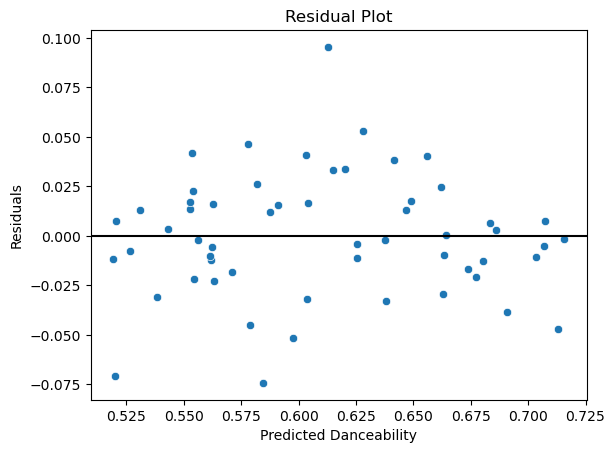

In [16]:
def generate_residual_plot(pred, resid):
    sns.scatterplot(x= pred, y=resid, marker="o")
    plt.axhline(y=0 ,color="black")
    plt.xlabel("Predicted Danceability")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()
    
generate_residual_plot(train_predictions, residuals)

In [9]:
Xmar =  averagefinal[[ "avg_unemployment", "election", "avg_deathrate", \
                      "avg_stockreturn", "recession"]]
ymar = averagefinal[["avg_valence"]]

Xmar = sm.add_constant(Xmar)
est = sm.OLS(ymar, Xmar).fit()
print('Multivar OLS Regression for Valence:')
print(est.summary())

Multivar OLS Regression for Valence:
                            OLS Regression Results                            
Dep. Variable:            avg_valence   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     34.88
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           3.53e-15
Time:                        20:31:37   Log-Likelihood:                 115.63
No. Observations:                  56   AIC:                            -219.3
Df Residuals:                      50   BIC:                            -207.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
con

From the heatmap all the way on the top, we know that collinearity is not an issue between avg_unemployment and recession as the correlation between these two variables is 0.15. Since recessions often bring heightened anxiety, uncertainty, and other negative sentiments, which could amplify the effect of unemployment on people’s attitudes and well-being. Therefore,  we suspect that there is some sort of relationship between unemployment and recession that will affect its outcome on valence. This is why we added the interaction term between unemployment and recession, which accounts for the possibility that the effect of unemployment on valence is conditional upon whether or not the economy is in a recession. 
 
However, the interaction plot showed no crossing lines, meaning there is no significant difference between the effect avg_unemployment has on valence during recession years and non-recession years.  

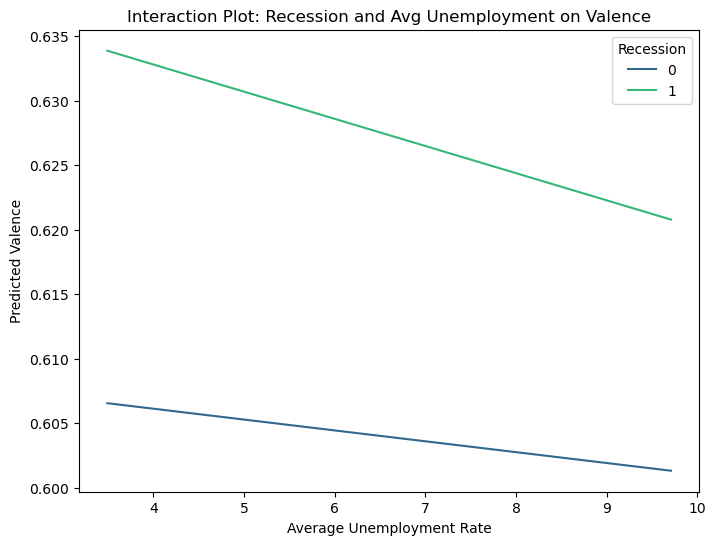

In [10]:
averagefinal['interaction'] = averagefinal['avg_unemployment'] * averagefinal['recession']

# Define independent variables (including interaction) and dependent variable
X = averagefinal[['avg_unemployment', 'recession', 'interaction']]
y = averagefinal['avg_valence']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
interaction_model = sm.OLS(y, X).fit()

recession_levels = [0, 1]
unemployment_range = np.linspace(averagefinal['avg_unemployment'].min(), averagefinal['avg_unemployment'].max(), 100)

plot_data = pd.DataFrame({
    'avg_unemployment': np.tile(unemployment_range, len(recession_levels)),
    'recession': np.repeat(recession_levels, len(unemployment_range))
})

plot_data['interaction'] = plot_data['avg_unemployment'] * plot_data['recession']
plot_data = sm.add_constant(plot_data)


plot_data['predicted_valence'] = interaction_model.predict(plot_data)

plt.figure(figsize=(8, 6))

sns.lineplot(
    data=plot_data,
    x='avg_unemployment',  # Use avg_unemployment for the x-axis
    y='predicted_valence',  # Predicted valence as the y-axis
    hue='recession',  # Recession levels as different lines
    palette="viridis"  # Optional: Adjust color scheme
)

plt.title("Interaction Plot: Recession and Avg Unemployment on Valence")
plt.xlabel("Average Unemployment Rate")
plt.ylabel("Predicted Valence")
plt.legend(title="Recession")
plt.show()

We also suspect that stock returns may influence valence differently, depending on whether or not it's an election year due to domain knowledge. As elections often generate significant political and economic uncertainty, and people’s reactions to stock market fluctuations might be amplified or mitigated depending on whether it is an election year.Therefore, we created an interaction plot to better visualize how the predicted valence changes with stock returns across different election scenarios (election years vs. non-election years). This plot helps us to see whether the effect of stock returns on valence is consistent across both scenarios or whether it differs.

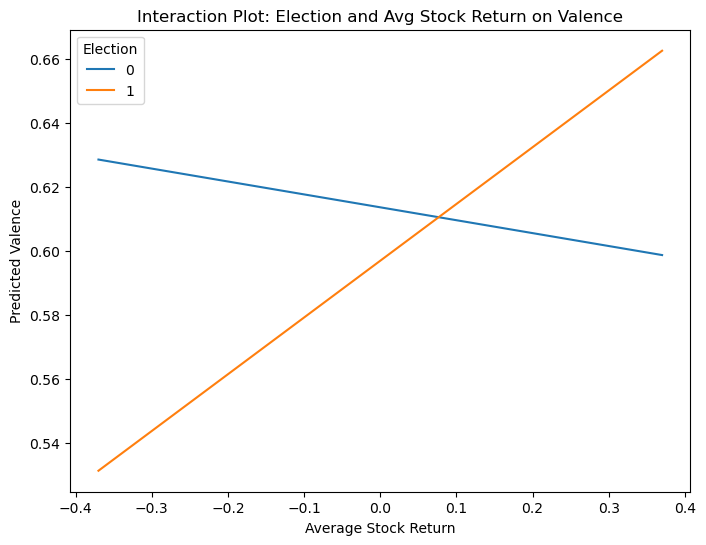

In [11]:
averagefinal['interaction'] = averagefinal['avg_stockreturn'] * averagefinal['election']

# Define independent variables (including interaction) and dependent variable
X = averagefinal[['avg_stockreturn', 'election', 'interaction']]
y = averagefinal['avg_valence']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
interaction_model = sm.OLS(y, X).fit()

election_levels = [0, 1]
stockreturn_range = np.linspace(averagefinal['avg_stockreturn'].min(), averagefinal['avg_stockreturn'].max(), 100)

plot_data = pd.DataFrame({
    'avg_stockreturn': np.tile(stockreturn_range, len(election_levels)),
    'election': np.repeat(election_levels, len(stockreturn_range))
})

plot_data['interaction'] = plot_data['avg_stockreturn'] * plot_data['election']
plot_data = sm.add_constant(plot_data)


plot_data['predicted_valence'] = interaction_model.predict(plot_data)

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=plot_data,
    x='avg_stockreturn',
    y='predicted_valence',
    hue='election'
)
plt.title("Interaction Plot: Election and Avg Stock Return on Valence")
plt.xlabel("Average Stock Return")
plt.ylabel("Predicted Valence")
plt.legend(title="Election")
plt.show()

As observed in the interaction plot above, there is a noticeable intersection between the lines representing average stock return during election years and non-election years. This suggests that stock returns might influence public sentiment (valence) differently depending on whether it is an election year or not. The interaction term was included in the model to check whether this effect is statistically significant. The hypothesis was that if the interaction term was significant, it would indicate that stock returns have a differentiated effect on valence during election years. However, as observed in the regression output, the p-value for the interaction term (stock_election) was greater than 0.05. This indicates that the interaction between stock returns and election years does not have a statistically significant impact on valence. The result suggest that stock_election is not necessary and should not be included in the final model. 

In [12]:
averagefinal['stock_election'] = averagefinal['avg_stockreturn'] * averagefinal['election']


Xmar = averagefinal[['avg_unemployment', 'election', 'avg_deathrate', 
                     'avg_stockreturn', 'recession', 
                     'stock_election']]

ymar = averagefinal['avg_valence']
Xmar = sm.add_constant(Xmar)

est_interaction = sm.OLS(ymar, Xmar).fit()

print('Multivar OLS Regression for Valence:')
print(est_interaction.summary())

Multivar OLS Regression for Valence:
                            OLS Regression Results                            
Dep. Variable:            avg_valence   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     29.28
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.33e-14
Time:                        20:31:41   Log-Likelihood:                 116.23
No. Observations:                  56   AIC:                            -218.5
Df Residuals:                      49   BIC:                            -204.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
con